In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from scipy import stats as st

data_calls = pd.read_csv('/datasets/calls.csv')
data_internet = pd.read_csv('/datasets/internet.csv')
data_messages = pd.read_csv('/datasets/messages.csv')
data_tariffs = pd.read_csv('/datasets/tariffs.csv')
data_users = pd.read_csv('/datasets/users.csv')
data_calls.info()
data_internet.info()
data_messages.info()
data_tariffs.info()
data_users.info()

display(data_calls.head(5))
display(data_internet.head(5))
display(data_messages.head(5))
display(data_tariffs)
display(data_users.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
<class 'pandas.core.frame.DataFrame'>
Rang

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


### Вывод  
1) Проверил каждую таблиц методом info и визуально. Каких-либо сложностей и недочетов в таблице не увидел.  
2) Пропущенные значения только в одном тсолбце "churn_date".

### Шаг 2. Подготовка данных

In [2]:

#убираем из таблица строки со значением 0 в столбце "mb_used"
data_internet = data_internet.query("mb_used != 0.00")
#убираем из таблица строки со значением 0 в столбце "duration"
data_calls = data_calls.query("duration != 0.00") 

#округление до целых чисел в большую сторону кол-во минут, так как это условие оператора связи
data_calls['duration'] = data_calls['duration'].apply(np.ceil)
#округление до целых чисел в большую сторону кол-во мегабайт, так как это условие оператора связи
data_internet['mb_used'] = data_internet['mb_used'].apply(np.ceil) 

data_calls['duration'] = data_calls['duration'].astype(int)
data_internet['mb_used'] = data_internet['mb_used'].astype(int)


#для группировки по месяцям, выделяем месяц в отдельный столбец
data_calls['month'] = pd.DatetimeIndex(data_calls['call_date']).month
data_messages['month'] = pd.DatetimeIndex(data_messages['message_date']).month
data_internet['month'] = pd.DatetimeIndex(data_internet['session_date']).month


#определение кол-ва звонков по месяцам
data_pivot_calls_count = data_calls.pivot_table(index = ['user_id','month'], values = 'duration', aggfunc = 'count')
#определение кол-ва израсходованных минут по месяцам
data_pivot_calls_sum = data_calls.pivot_table(index = ['user_id','month'], values = 'duration', aggfunc = 'sum')
#display(data_pivot_calls_sum.head(10))
#определяем кол-во отправленных смс по месяцам
data_pivot_messages_count = data_messages.pivot_table(index = ['user_id','month'], values = 'id', aggfunc = 'count')
#display(data_pivot_messages_count.head(10))
#определеяем кол-во израсходованных мегабайт по месяцам
data_pivot_internet_sum = data_internet.pivot_table(index = ['user_id','month'], values = 'mb_used', aggfunc = 'sum') 
#display(data_pivot_internet_sum.head(10))


#удаляем пустые значение
data_pivot_calls_count = data_pivot_calls_count.fillna(0)
data_pivot_calls_sum = data_pivot_calls_sum.fillna(0)
data_pivot_messages_count = data_pivot_messages_count.fillna(0)
data_pivot_internet_sum = data_pivot_internet_sum.fillna(0)



#округление до целых чисел в большую сторону кол-во минут, так как это условие оператора связи
data_calls['duration'] = data_calls['duration'].apply(np.ceil)
#округление до целых чисел в большую сторону кол-во мегабайт, так как это условие оператора связи
data_internet['mb_used'] = data_internet['mb_used'].apply(np.ceil)


#находим ежемесячныую абонентскую плату по каждому пользовтаелю

#переименование столбцов в таблице
data_pivot_calls_sum.set_axis(['minutes'], axis = 'columns', inplace = True)
data_pivot_messages_count.set_axis(['sms'], axis = 'columns', inplace = True)


#соединяем в одну таблицу три таблицы со значениями по звонкам, смс и интернет-трафику
general_table = data_pivot_calls_sum.merge(data_pivot_messages_count, on = ['user_id','month'], how = 'left')
general_table_1 = general_table.merge(data_pivot_internet_sum, on = ['user_id','month'], how = 'left')
#заменяем значения Nan на 0, так как бывают ситуации когда какой-либо услугой за месяц не пользовались
general_table_1 = general_table_1.fillna(0)
#таблицу, которая получилась со всеми значениями по пользователя мержим с таблицой с данными пользователей
general_table_2 = general_table_1.merge(data_users, on = ['user_id'], how = 'left')
#удаляем из таблицы лишние столбцы
general_table_2 = general_table_2.drop(['age','churn_date','first_name','last_name','reg_date'], 1)
#переименование столбцов в таблице
general_table_2.set_axis(['user_id','minutes','sms','mb_used','city','tariff_name'], axis = 'columns', inplace = True)
#к сводной таблице с данными по использованию услугами добавляем значения по условиям по каждому тарифу
final_table = general_table_2.merge(data_tariffs, on = ['tariff_name'], how = 'left')
#добавляю столбцы с превышением по лимитам
final_table['limit_min'] = final_table['minutes'] - final_table['minutes_included']
final_table['limit_sms'] = final_table['sms'] - final_table['messages_included']
final_table['limit_mb'] = (final_table['mb_used'] - final_table['mb_per_month_included']) / 1000
#чтобы найти стоимость по превышенным лимитам услуг заменяю отрицательные значения на 0
final_table.loc[final_table['limit_min'] < 0, 'limit_min'] = 0
final_table.loc[final_table['limit_sms'] < 0, 'limit_sms'] = 0
final_table.loc[final_table['limit_mb'] < 0, 'limit_mb'] = 0
#нахожу ежемесячный доход по каждому клиенту
final_table['money_month'] = final_table['rub_monthly_fee'] + final_table['limit_min']*final_table['rub_per_minute'] + final_table['limit_sms']*final_table['rub_per_message'] + final_table['limit_mb']*final_table['rub_per_gb']
#удаляю лишние столбцы из финальной таблицы
final_table = final_table.drop(['messages_included','mb_per_month_included','minutes_included','rub_monthly_fee','rub_per_gb', 'rub_per_message', 'rub_per_minute'], 1)    
   
display(final_table.head(15))


,user_id,minutes,sms,mb_used,city,tariff_name,limit_min,limit_sms,limit_mb,money_month
0,1000,159,22.0,2256.0,Краснодар,ultra,0,0.0,0.000,1950.0
1,1000,172,60.0,23257.0,Краснодар,ultra,0,0.0,0.000,1950.0
2,1000,340,75.0,14016.0,Краснодар,ultra,0,0.0,0.000,1950.0
3,1000,408,81.0,14070.0,Краснодар,ultra,0,0.0,0.000,1950.0
4,1000,466,57.0,14581.0,Краснодар,ultra,0,0.0,0.000,1950.0
5,1000,350,73.0,14717.0,Краснодар,ultra,0,0.0,0.000,1950.0
6,1000,338,58.0,14768.0,Краснодар,ultra,0,0.0,0.000,1950.0
7,1000,333,70.0,9827.0,Краснодар,ultra,0,0.0,0.000,1950.0
8,1001,430,0.0,18452.0,Москва,smart,0,0.0,3.092,1168.4
9,1001,414,0.0,14053.0,Москва,smart,0,0.0,0.000,550.0


### Вывод
1) Преобразовывать типы данных не нужно. Данные имеют нужный тип.  
2) Проверка некоторых столбцов методом "describe":  
   а) Столбец "duration" в таблице "data_calls" не имеет каких-либо аномалий - http://joxi.ru/L21PoKbi0DV4qm   
   б) Столбец "mb_used" в таблице "data_internet" не имеет каких-либо аномалий - http://joxi.ru/12Mq6OjFk8Xj92   
3) Слишком хорошие и чистые данные, даже как то подозрительно, не понимаю в чем тут подвох 😀😀😀😀  
4) В таблице "data_calls" присутсвуют нулевые значения в столбце "duration" в количестве 39613 из 202607. Данные строки можно удалить, так как они не несут никакой информации. Ведь у нас в тарифах привязка идет кол-ву минут, а не к кол-ву звонков)   
5) Проведем аналогичное действие из пункта 4 к таблице "data_internet" со столбцом "mb_used". В столбце "mb_used" присутствуют нулевые значения в количестве 19598 из 149396. Данные строки можно удалить, так как они не несут никакой информации. Ведь у нас в тарифах привязка идет кол-ву потраченных гигабайт, а не к кол-ву заходов в интернет)   
6) Таблицы "data_calls" и "data_internet" очистил от нулевых значений в столбцах "duration" и "mb_used".   
7) В таблицах "data_calls" и "data_internet" округлил до целых чисел в большую сторону кол-во минут и мегабайт, так как это условие оператора связи  
8) Подсчитал по каждому пользовтаелю потраченные минуты - http://joxi.ru/zANgWnVUjwROZr, сообщения - http://joxi.ru/Grq4pbgiGbLK8A и интернет-трафик - http://joxi.ru/Rmz4Z0kiMVBZKA   
9) Подсчитал ежемесчный платеж по каждому пользователю - http://joxi.ru/v296pxlUpjxqKA  



### Шаг 3. Проанализируйте данные

Среднее значение по минутам тариф "Ультра": 546.9984013461286
Среднее значение по минутам тариф "Смарт": 420.8480194908561
Среднее значение по смс-сообщения тариф "Ультра": 64.55580197132616
Среднее значение по смс-сообщения тариф "Смарт": 37.57560563057251
Среднее значение по интернет-трафику тариф "Ультра": 19762.43560213407
Среднее значение по интернет-трафику тариф "Смарт": 16237.003014945372
Дисперсия по минутам тариф "Ультра": 3100934764.105693
Дисперсия по минутам тариф "Смарт": 961213828.4716996
Дисперсия по смс-сообщения тариф "Ультра": 524545.3477184337
Дисперсия по смс-сообщения тариф "Смарт": 74816.80451997285
Дисперсия по интернет-трафика тариф "Ультра": 2898099251981827.5
Дисперсия по интернет-трафика тариф "Смарт": 1521335223291468.0
Стандартное отклонение по минутам тариф "Ультра": 55686.03742506458
Стандартное отклонение по минутам тариф "Смарт": 31003.448654491644
Стандартное отклонение по смс-сообщениям тариф "Ультра": 724.2550294740339
Стандартное отклонение по смс-

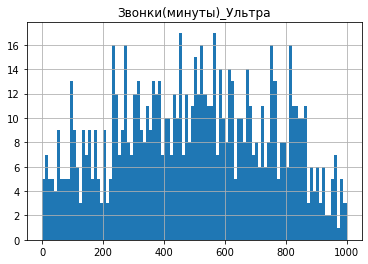

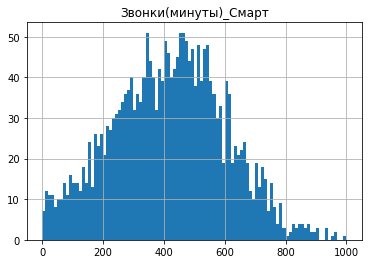

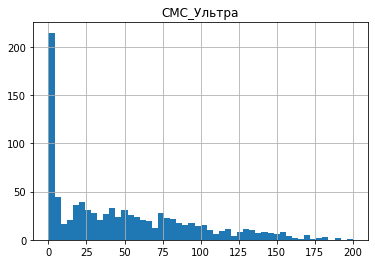

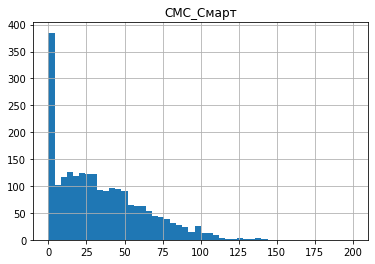

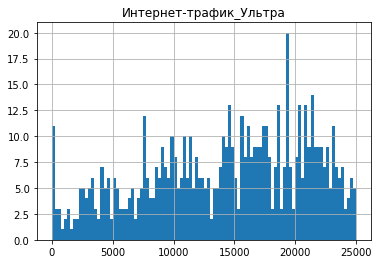

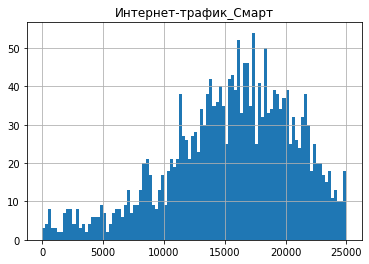

In [3]:

data_calls = data_calls.query("duration != 0.00")

#группируем по месяцам потраченные минуты
data_pivot_calls_sum = data_calls.pivot_table(index = 'user_id', columns = 'month', values = 'duration', aggfunc = 'sum')
#группируем по месяцам отправленные смс сообщения
data_pivot_messages_count = data_messages.pivot_table(index = 'user_id', columns = 'month', values = 'id', aggfunc = 'count')
#группируем по месяцам потраченные мегабайты
data_pivot_internet_sum = data_internet.pivot_table(index = 'user_id', columns = 'month', values = 'mb_used', aggfunc = 'sum')



#добавяем в таблицу с группированными данными наименование тарифа
data_pivot_calls_sum_users = data_pivot_calls_sum.merge(data_users[['user_id','tariff']], on = 'user_id')
data_pivot_calls_sum_users = data_pivot_calls_sum_users.drop('user_id', 1) #удаляем столбец с user_id
data_pivot_messages_count_users = data_pivot_messages_count.merge(data_users[['user_id','tariff']], on = 'user_id')
data_pivot_messages_count_users = data_pivot_messages_count_users.drop('user_id', 1) #удаляем столбец с user_id
data_pivot_internet_sum_users = data_pivot_internet_sum.merge(data_users [['user_id','tariff']], on = 'user_id')
data_pivot_internet_sum_users = data_pivot_internet_sum_users.drop('user_id', 1)  #удаляем столбец с user_id

#добавляем столбец со среднем по пользовтаелям
data_pivot_calls_sum_users['mean'] = data_pivot_calls_sum_users.mean(axis=1)
data_pivot_messages_count_users['mean'] = data_pivot_messages_count_users.mean(axis=1)
data_pivot_internet_sum_users['mean'] = data_pivot_internet_sum_users.mean(axis=1)




#находим среднее значение по звонкам, смс-сообщениям и интернет-трафику: 
#звонки
data_pivot_calls_sum_users_ultra = data_pivot_calls_sum_users.query("tariff == 'ultra'")
calls_mean_ultra = data_pivot_calls_sum_users_ultra['mean'].mean()
data_pivot_calls_sum_users_smart = data_pivot_calls_sum_users.query("tariff == 'smart'")
calls_mean_smart = data_pivot_calls_sum_users_smart['mean'].mean()
#смс-сообщения
data_pivot_messages_count_users_ultra = data_pivot_messages_count_users.query("tariff == 'ultra'")
messages_mean_ultra = data_pivot_messages_count_users_ultra['mean'].mean()
data_pivot_messages_count_users_smart = data_pivot_messages_count_users.query("tariff == 'smart'")
messages_mean_smart = data_pivot_messages_count_users_smart['mean'].mean()
#интернет-трафик
data_pivot_internet_sum_users_ultra = data_pivot_internet_sum_users.query("tariff == 'ultra'")
internet_mean_ultra = data_pivot_internet_sum_users_ultra['mean'].mean()
data_pivot_internet_sum_users_smart = data_pivot_internet_sum_users.query("tariff == 'smart'")
internet_mean_smart = data_pivot_internet_sum_users_smart['mean'].mean()

print('Среднее значение по минутам тариф "Ультра":',calls_mean_ultra)
print('Среднее значение по минутам тариф "Смарт":',calls_mean_smart)
print('Среднее значение по смс-сообщения тариф "Ультра":',messages_mean_ultra)
print('Среднее значение по смс-сообщения тариф "Смарт":',messages_mean_smart)
print('Среднее значение по интернет-трафику тариф "Ультра":',internet_mean_ultra)
print('Среднее значение по интернет-трафику тариф "Смарт":',internet_mean_smart)




#подсчет дисперсии:
#добавляем столбец с дисперсией по каждому пользователю
data_pivot_calls_sum_users = data_pivot_calls_sum_users.drop('mean', 1) #удаляем столбец со среднем значением, который добавлял в предыдущем шаге
data_pivot_calls_sum_users['dis'] = np.var(data_pivot_calls_sum_users, axis=1)
data_pivot_messages_count_users = data_pivot_messages_count_users.drop('mean', 1) #удаляем столбец со среднем значением, который добавлял в предыдущем шаге
data_pivot_messages_count_users['dis'] = np.var(data_pivot_messages_count_users, axis=1)
data_pivot_internet_sum_users = data_pivot_internet_sum_users.drop('mean', 1) #удаляем столбец со среднем значением, который добавлял в предыдущем шаге
data_pivot_internet_sum_users['dis'] = np.var(data_pivot_internet_sum_users, axis=1)


#группируем данные по тарифам
#звонки
data_pivot_calls_sum_users_ultra = data_pivot_calls_sum_users.query("tariff == 'ultra'")
data_pivot_calls_sum_users_smart = data_pivot_calls_sum_users.query("tariff == 'smart'")
#смс-сообщения
data_pivot_messages_count_users_ultra = data_pivot_messages_count_users.query("tariff == 'ultra'")
data_pivot_messages_count_users_smart = data_pivot_messages_count_users.query("tariff == 'smart'")
#интернет-трафик
data_pivot_internet_sum_users_ultra = data_pivot_internet_sum_users.query("tariff == 'ultra'")
data_pivot_internet_sum_users_smart = data_pivot_internet_sum_users.query("tariff == 'smart'")


#находим дисперсию по каждому тарифу
#звонки(минуты)
variance_calls_ultra = np.var(data_pivot_calls_sum_users_ultra.loc[:, 'dis'])
variance_calls_smart = np.var(data_pivot_calls_sum_users_smart.loc[:, 'dis'])
#смс-сообщения
variance_messages_ultra = np.var(data_pivot_messages_count_users_ultra.loc[:, 'dis'])
variance_messages_smart = np.var(data_pivot_messages_count_users_smart.loc[:, 'dis'])
#интернет-трафик
variance_internet_ultra = np.var(data_pivot_internet_sum_users_ultra.loc[:, 'dis'])
variance_internet_smart = np.var(data_pivot_internet_sum_users_smart.loc[:, 'dis'])
print('Дисперсия по минутам тариф "Ультра":', variance_calls_ultra)
print('Дисперсия по минутам тариф "Смарт":', variance_calls_smart)
print('Дисперсия по смс-сообщения тариф "Ультра":', variance_messages_ultra)
print('Дисперсия по смс-сообщения тариф "Смарт":', variance_messages_smart)
print('Дисперсия по интернет-трафика тариф "Ультра":', variance_internet_ultra)
print('Дисперсия по интернет-трафика тариф "Смарт":', variance_internet_smart)



#подсчет стандартного отклонения: 
#звонки(минуты)
standard_deviation_calls_ultra = np.sqrt(variance_calls_ultra)
standard_deviation_calls_smart = np.sqrt(variance_calls_smart)
#смс-сообщения
standard_deviation_messages_ultra = np.sqrt(variance_messages_ultra)
standard_deviation_messages_smart = np.sqrt(variance_messages_smart)
#интернет-трафик
standard_deviation_internet_ultra = np.sqrt(variance_internet_ultra)
standard_deviation_internet_smart = np.sqrt(variance_internet_smart)
print('Стандартное отклонение по минутам тариф "Ультра":', standard_deviation_calls_ultra)
print('Стандартное отклонение по минутам тариф "Смарт":', standard_deviation_calls_smart)
print('Стандартное отклонение по смс-сообщениям тариф "Ультра":', standard_deviation_messages_ultra)
print('Стандартное отклонение по смс-сообщениям тариф "Смарт":', standard_deviation_messages_smart)
print('Стандартное отклонение по интернет-трафику тариф "Ультра":', standard_deviation_internet_ultra)
print('Стандартное отклонение по интернет-трафику тариф "Смарт":', standard_deviation_internet_smart)


#построение гистограмм:

general_table_2_ultra = general_table_2.query("tariff_name == 'ultra'")
general_table_2_smart = general_table_2.query("tariff_name == 'smart'")

general_table_2_ultra['minutes'].hist(bins=100, range=(0, 1000));
plt.title("Звонки(минуты)_Ультра")
plt.show()
general_table_2_smart['minutes'].hist(bins=100, range=(0, 1000));
plt.title("Звонки(минуты)_Смарт")
plt.show()
general_table_2_ultra['sms'].hist(bins=50, range=(0, 200));
plt.title("СМС_Ультра")
plt.show()
general_table_2_smart['sms'].hist(bins=50, range=(0, 200));
plt.title("СМС_Смарт")
plt.show()
general_table_2_ultra['mb_used'].hist(bins=100, range=(0, 25000));
plt.title("Интернет-трафик_Ультра")
plt.show()
general_table_2_smart['mb_used'].hist(bins=100, range=(0, 25000));
plt.title("Интернет-трафик_Смарт")
plt.show()
        


### Шаг 3. Выводы. 

1) Оставил комментарии по коду: для начала сгруппировал по месяцам, затем смержил по user_id и добавил тариф к каждому пользовтаелю. Затем находил среднее, дисперсию и стандартное отклонение по каждому из параметров.  
2) Построил графики по среднему значению звонков(минуты), смс-сообщения, интернет-трафик.  
По распределению, сложно сказать, так как наблюдается повышение активности по всем услугам к концу года, и если брать во внимание что скорей всего активность упадет с января 2019 и затем опять к декабрю будет расти. Получается распредеение будет идти в виде - http://joxi.ru/8AneqJVIyKMvV2 (в любом случае с каждым годом у оператора расте количество пользователей и соотственно объем услуг растет)     


### Шаг 4. Проверьте гипотезы


In [4]:
#Проверка гипотезы - средняя выручка пользователей тарифов «Ультра» и «Смарт» различается
#Нулевая гипотеза - средняя выручка пользователей тарифов "Ультра" и "Смарт" равна между собой
#Альтернативная гипотеза - средняя выручка пользователей тарифов "Ультра" и "Смарт" не равна между собой

final_table_ultra = final_table.query("tariff_name == 'ultra'")
final_table_ultra = final_table_ultra.drop(['user_id','minutes','sms','mb_used','city','tariff_name','limit_min','limit_sms','limit_mb'], 1)
final_table_smart = final_table.query("tariff_name == 'smart'") 
final_table_smart = final_table_smart.drop(['user_id','minutes','sms','mb_used','city','tariff_name','limit_min','limit_sms','limit_mb'], 1)

alpha = 0.05


results = st.ttest_ind(final_table_ultra, final_table_smart, equal_var = True)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
    
#Проверка гипотезы - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов
#Нулевая гипотеза - средняя выручка пользователей из Москвы равна выручки пользователей из других регионов
#Альтернативная гипотеза - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

final_table_msk = final_table.query("city == 'Москва'")
final_table_msk = final_table_msk.drop(['user_id','minutes','sms','mb_used','city','tariff_name','limit_min','limit_sms','limit_mb'], 1)
final_table_other = final_table.query("city != 'Москва'") 
final_table_other = final_table_other.drop(['user_id','minutes','sms','mb_used','city','tariff_name','limit_min','limit_sms','limit_mb'], 1)

alpha = 0.05

results = st.ttest_ind(final_table_msk, final_table_other, equal_var = True)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")




p-значение: [1.23322904e-173]
Отвергаем нулевую гипотезу
p-значение: [0.41845669]
Не получилось отвергнуть нулевую гипотезу


### Шаг 4. Выводы 

1) Первая гипотеза - средняя выручка пользователей тарифов «Ультра» и «Смарт» различается    
Нулевая гипотеза - средняя выручка пользователей тарифов "Ультра" и "Смарт" равна между собой (из лекции сказано, что нулевая гипотеза всегда формируются так, чтобы использовать знак равенства)   
Альтернативная гипотеза - средняя выручка пользователей тарифов "Ультра" и "Смарт" не равна между собой  

Вывод - отвергаем нулевую гипотезу, значит средняя выручка пользовтаелей тарифов "Ультра" и "Смарт" не равна междй собой!!! (это в целом и закономерно, так как абонетская плата по тарифам отличается на 70%) 


2) Вторая гипотеза - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов  
Нулевая гипотеза - средняя выручка пользователей из Москвы равна выручки пользователей из других регионов (из лекции сказано, что нулевая гипотеза всегда формируются так, чтобы использовать знак равенства)  
Альтернативная гипотеза - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов  

Вывод - не отвергаем нулевую гипотезу, значит средняя выручка пользователей из Москвы равна выручки пользователей из других регионов!!! 


Для обоих гипотез взял урвоень значимости - 5% (так как ранее писалось, что это общепринятое значение) 




### Шаг 5. Общие выводы

Работа выполнялась по следующим шагам:    
1) Для начала нашел использованные услуги по каждому месяце по каждому пользовтаелю.   
2) По каждому пользователю нашли превышение лимита по каждой из услуг  
3) Нашел ежмесячный платеж по каждому пользовтаелю (сумма абонетской платы + стоимость услуг по превышенным лимитам)   
4) Были найдено среднее значение по пользовтаелям, дисперсию и стандартное отклонение. Были построены гистограммы.   
5) Проверены 2 гипотезы: 
   а) Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается  
   б) Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов  
6) По итогам проверки гипотез смогли выяснить, что активность пользователей не зависит от места жительства, в любой точки нашей страны услугами оператора мобильной связи пользуются в равной степени.     
Средняя выручка по двум тарифам "Ультра" и "Смарт" отличаются.   
7) Есть зависимость по использованию телефона в течение года, в начале года активность не сильно большая, но под конец года активность возрасает это видно на графиках. Можно сказать, что это относится к обоим тарифным планам!  





